In [14]:
import jax
import numpy as np
import jax.numpy as jnp
import jax.scipy as jsp

[0.61256386 0.09856334 0.73598261]
[1, 0, 1]


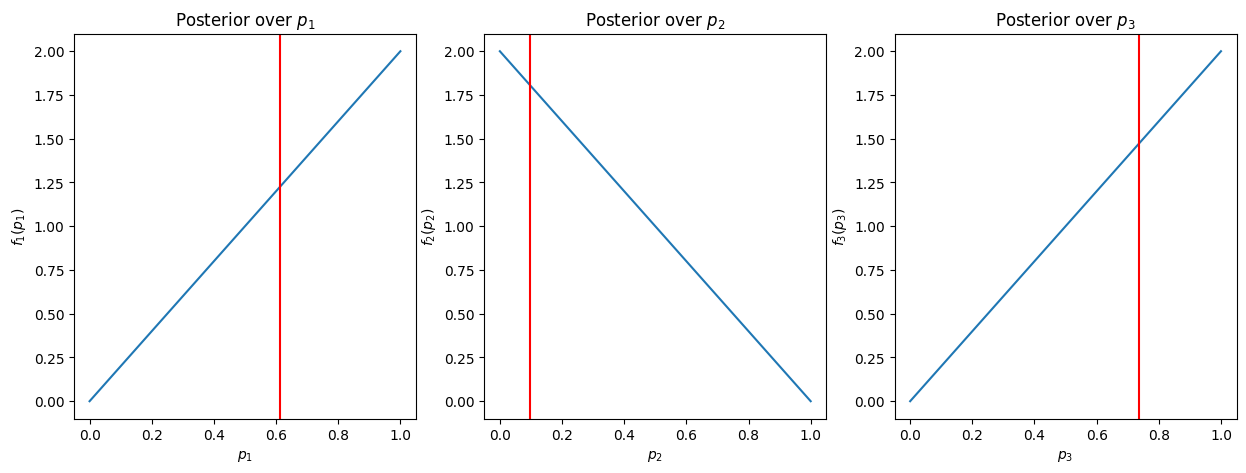

In [23]:
from scipy.stats import bernoulli
from scipy.stats import beta
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(5)

num_arms = 3

# The true means
true_means = beta.rvs(1,1,size=num_arms)
print(true_means)
# Some data 
#trials = asarray([10,10,0])
#success = asarray([binom.rvs(trials[i],true_means[i]) for i in range(num_arms)])
#fails = trials - success
trials = [1,1,1]
success = [1,0,1]
fails=[0,1,0]

print(success)

# posterior distributions over rewards  = beta(1+fails,1+success)
posteriors = [beta(1+success[i],1+fails[i]) for i in range(num_arms)]

x = np.linspace(0,1,100)
fig,ax = plt.subplots(1,len(true_means),figsize=(15,5))
for indx,pos in enumerate(posteriors):
    ax[indx].plot(x,pos.pdf(x),label=indx)
    ax[indx].axvline(true_means[indx],color="red")
    ax[indx].set_title("Posterior over $p_"+str(indx+1)+"$")
    ax[indx].set_xlabel("$p_"+str(indx+1)+"$")
    ax[indx].set_ylabel("$f_"+str(indx+1)+"(p_"+str(indx+1)+")$")

plt.show()
